In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [51]:
import seaborn as sns

In [52]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

# General Overview Of Dataset


In [53]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [54]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [55]:
exercise_df = exercise.merge(calories, on ="User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [56]:
print("This dataset has", exercise_df.shape[0], "instance and", exercise_df.shape[1], "columns.")

This dataset has 15000 instance and 9 columns.


In [57]:
exercise_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [58]:
print("column : ")
for i , column in zip(range(len(exercise_df.columns)), exercise_df.columns):
    print("\t", i+1, ":", column)

column : 
	 1 : User_ID
	 2 : Gender
	 3 : Age
	 4 : Height
	 5 : Weight
	 6 : Duration
	 7 : Heart_Rate
	 8 : Body_Temp
	 9 : Calories


1. User_ID : The ID of the person which is unique.
2. Gender : The gender of the person.
3. Age : The age of the person.
4. Hight : Hight of the person in cm.
5. Weight : The weight of the person in kg.
6. Duration : Duration of the person's exercise/activity.
7. Heart_Rate : Hate rate per min of the person.
8. Body_Temp : Body temperature of the person in degree Celsius.
9. Calories : The calories (in kilo calories) burned by the person during the exercise/activity .

# Dataset's Overall Satatistic

In [59]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


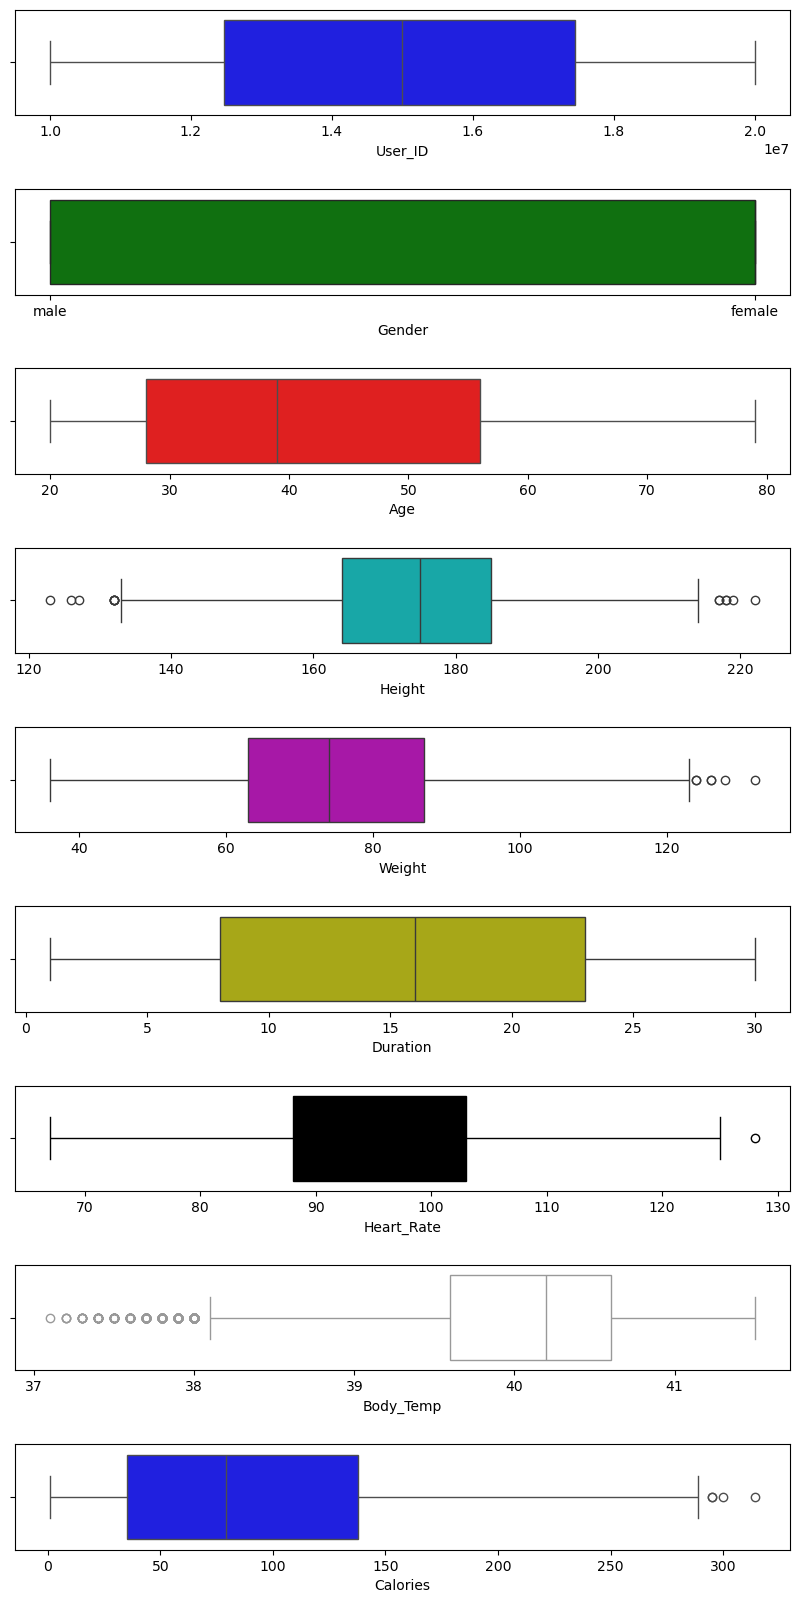

In [60]:
c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b'] # list of colors
fig, axes = plt.subplots(len(exercise_df.columns), 1, figsize=(10, 20)) # create a figure with multiple subplots
plt.subplots_adjust(wspace=0.3, hspace=0.7) # adjust the space between subplots
axes = axes.flatten() # flatten the list of axes
for i ,  column in zip(range(len(exercise_df.columns)), exercise_df.columns): # loop over each column in the dataframe
    try:
        sns.boxplot(data = exercise_df, x = column, color = c[i], ax = axes[i])
    except:
        fig1.delaxes(axes[i])
        continue    


# Overall information of Dataset

In [61]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


## Null Values

* In this section we are going to check whether this dataset has null values or not. We will use heatmap. Because it is easy to understand & visualize the data.

<Axes: >

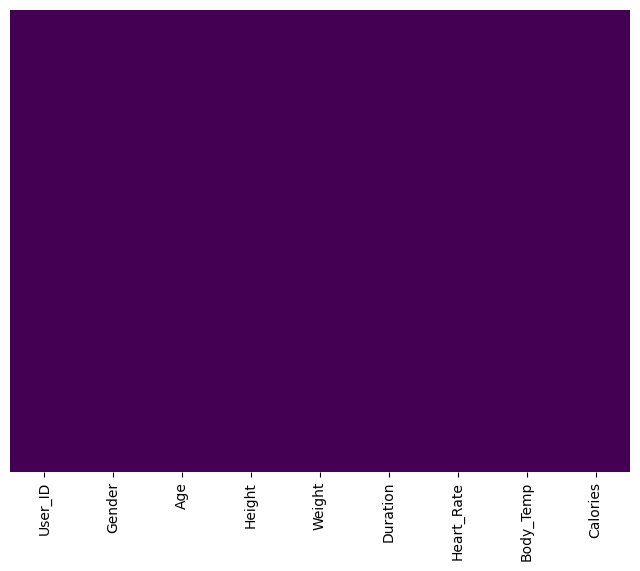

In [62]:
sns.heatmap(exercise_df.isnull(), yticklabels= False, cbar=False, cmap='viridis') 

* As we can see, fortunately, this dataset does not have ant null values, which  is good & it is not necessary to do manipulation with this dataset. 

# Drop Duplicates

* Lets assure that this dataset does not contains any duplicate values in User_ID column.

In [63]:
print("The shape of dataset before dropping duplicates :", exercise_df.shape) 
exercise_df.drop_duplicates(subset = ['User_ID'], keep ='last', inplace = True) 
print("The shape of dataset after dropping duplicates :", exercise_df.shape)

The shape of dataset before dropping duplicates : (15000, 9)
The shape of dataset after dropping duplicates : (15000, 9)


* As we can see, the shape of dataset before and after dropping duplicates is the same. It is a good sign, because we do not to be worry about Data Leakage.

* In the next step we have to delete User_ID feature. Because it is a low predictive features . In other words, it is only a useless features for our calories burned predicate model but also has a negative impact on model's accuracy.

In [64]:
exercise_df.drop(columns= "User_ID", inplace=True)

* for avoiding any Data Leakage in our model, let's split our data into training set and test set before doing any feature engineering

In [65]:
exercise_train_data , exercise_test_data = train_test_split(exercise_df, test_size=0.2, random_state=1)
print("Shape of training data: ", exercise_train_data.shape)
print("Shape of test data :", exercise_test_data.shape)

Shape of training data:  (12000, 8)
Shape of test data : (3000, 8)


# Dataset's Distribution

* One of the main criterions that wheather we will ba able to deploy our model into production or not, is that the distribution of features for both training set and test set must be similar. This is because the model is fitting on the training set & the model keeps in mind the training set patterns. When the distribution of test set is differnt from the training set it means that the model can not predct very well on test set examples & unlike the training set accurancy will be low. This is because, at first, we have to see & compare the distribution for both test set & check whether both have the same distribution or not.

<function matplotlib.pyplot.show(close=None, block=None)>

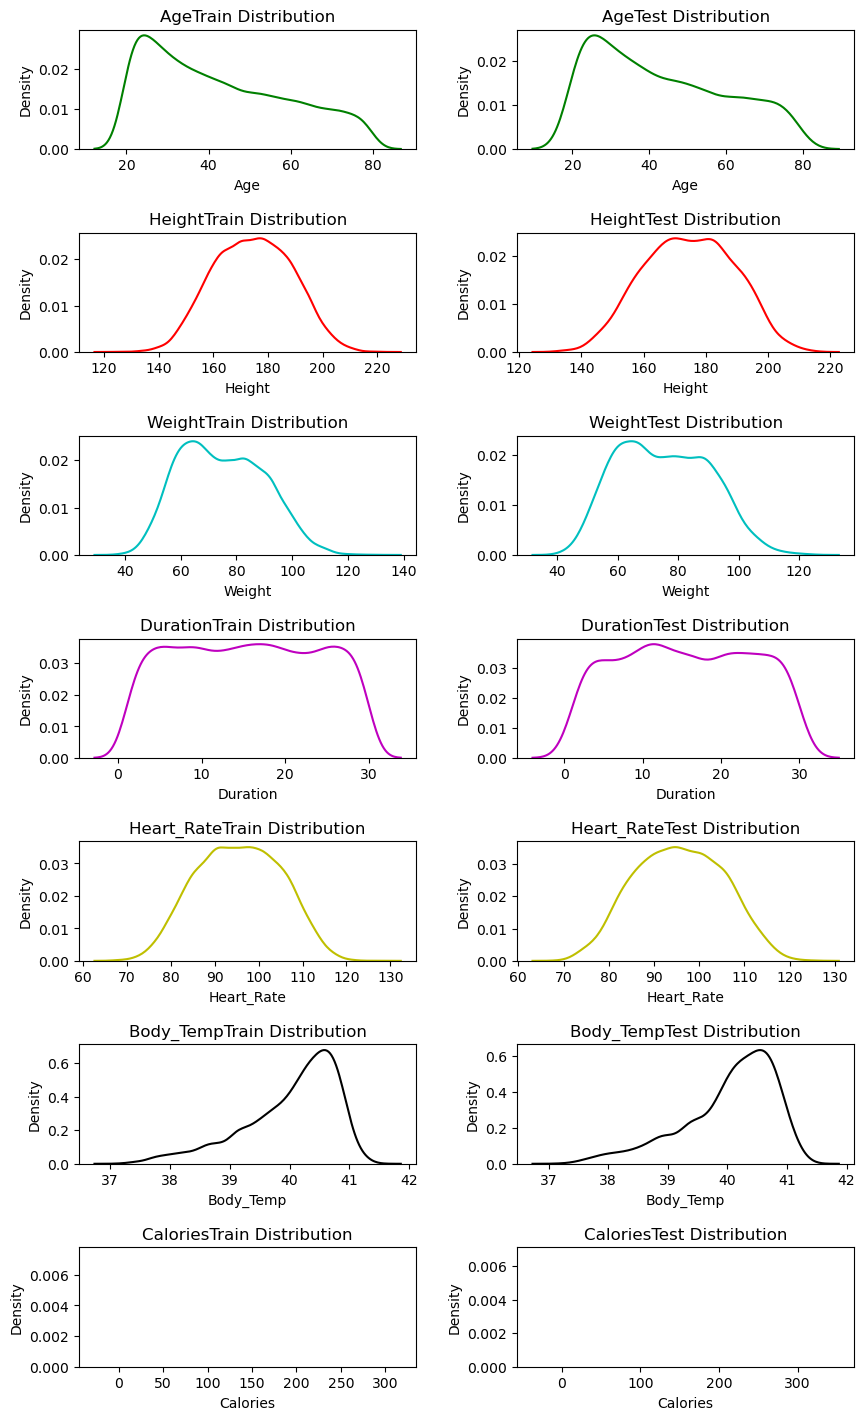

In [66]:
c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b'] # list of colors
fig1, axes = plt.subplots(len(exercise_train_data.columns), 2, figsize=(10, 20)) # create a figure with multiple subplots
plt.subplots_adjust(wspace=0.3, hspace=0.7) # adjust the space between subplots
axes = axes.flatten() # flatten the list of axes

for i , column, color in zip(range(0, len(exercise_train_data.columns)* 2, 2), exercise_train_data.columns, c):
    try:
        axes[i].title.set_text(column + "Train Distribution")
        sns.kdeplot(data= exercise_train_data, x=column, ax=axes[i], color=color) # plot the distribution of each column in the train data
    except :
        fig1.delaxes(axes[i])
        continue

for i , column, color in zip(range(1, len(exercise_test_data.columns)* 2,2), exercise_test_data.columns, c):
    try :
        axes[i].title.set_text(column + "Test Distribution")
        sns.kdeplot(data= exercise_test_data, x=column, ax=axes[i], color=color) 
    except :
        fig1.delaxes(axes[i])
        continue
plt.show

* As we can see, the distribution of features for training and test sets are pretty similar.

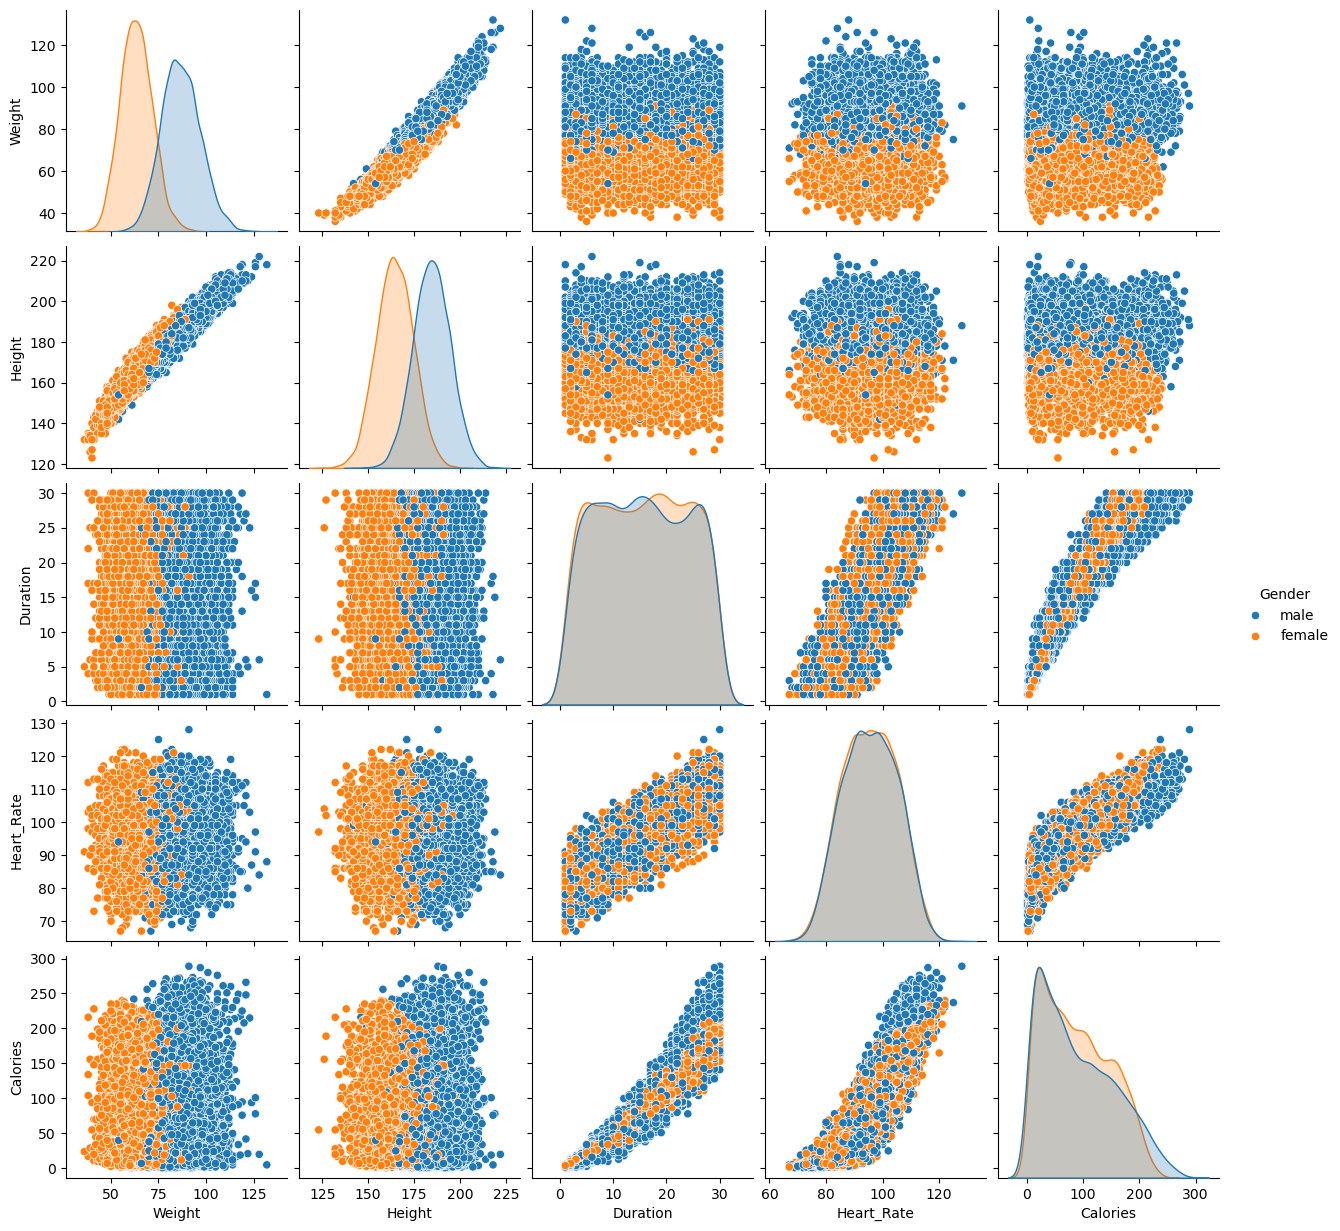

In [67]:
sns.pairplot(exercise_train_data[["Weight", "Height", "Duration", "Heart_Rate", "Calories", "Gender"]], hue="Gender") 


* As we can see from graph above, there is not a specific correlation or relationship between most of the features in the dataset, for example, there is not a specific relstionship between Duration and Weight or between Duration & height. This is because exercise may have differnt exercise duration no matter of their weight & height.
* In som case , a feature has a low relationship with another feature, like Duration and Heart_Rate. Somehow we can say that the more time somebody exercise the more 'Heart Rate' per min he/she will have.
* In some case, a feature has a high relationship with another feature, like Weight and Height.
* There are more information & benifits that we can get from correlation concept. But thats for now & we will go furthur in the next section.

# Exploratory Data Analysis(EDA)

In [68]:
print('Minimum age in dataset is :', exercise_train_data["Age"].min())
print('Maximum age in dataset is :', exercise_train_data["Age"].max())

Minimum age in dataset is : 20
Maximum age in dataset is : 79


* As we can see the oldest person in 79 yrs old & the youngest person is 20 yrs old.What we want to do is divide this  range of ages into named ranges. In other words we want to convert the continuous column into categorical column.

The ranges are:

| Name | Age |
| --- | --- |
| Young | {20, 40} |
| Middle_Aged | {41, 60} |
| Old | {61, 80} |

In [69]:
age_groups = ["Young", "Middle_Aged", "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"], bins = [20, 40, 60, 80], right = False, labels = age_groups) 
exercise_train_data["age_groups"].head()

2643             Old
13352            Old
13117            Old
2560             Old
14297    Middle_Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle_Aged' < 'Old']

In [70]:
exercise_train_data["age_groups"].value_counts()

age_groups
Young          6029
Middle_Aged    3535
Old            2436
Name: count, dtype: int64

* As we can see we have just converted a continuous column into a categories column. Now its time to analyze age_groups column in terms of different aspects.

<Axes: xlabel='age_groups', ylabel='count'>

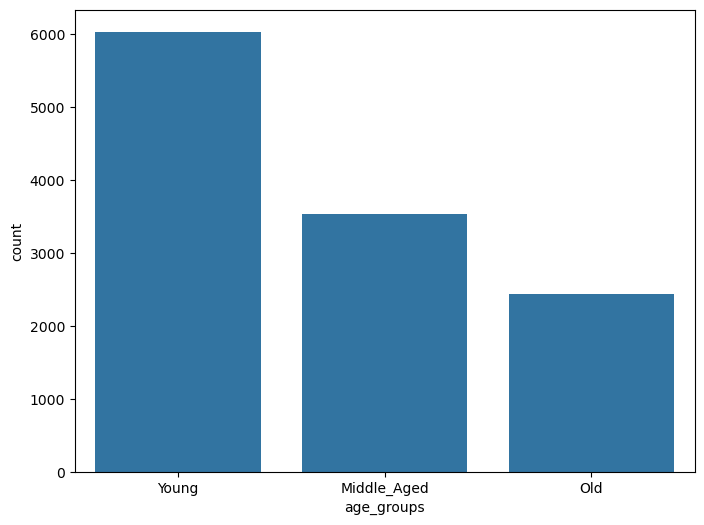

In [71]:
plt.rcParams["figure.figsize"] = 8, 6
sns.countplot(data = exercise_train_data, x= "age_groups")

Lets analyze hpw many kilocalories each age groups burned. We will do this with box plot . Because box plot has a intutive graph that we can extract Median, Interquartile Range, Qutilers & etc. 

--- A ---

In [72]:
fig = px.box(exercise_train_data, x = "age_groups", y ="Calories", color= "Gender")
fig.update_layout(
    width= 800,
    height= 500,
)
fig.show()

* As we can observe, old individuals have burned more calories than two other age groups. & the yound person are least in burning calories.
* Another intersting thing is , females in all age ranges performed very similar. In other words, they burned same amount of calories in average. But for males, old group outperformanced & the youth have the weakest performance.
* Also there is an outlier for young group which is shown by a point. This point has a vlaues which is greater than third  quartile plus 1.5 times of interquartile range magnitude.

Outlier > Q3 + 1.5 * IQR 

OR

Outlier < Q1 - 1.5 * IQR

Now Lets see which group have the most exercise duration in minutes.

In [73]:
fig = px.box(exercise_train_data, x = "age_groups", y ="Duration", color= "Gender")
fig.update_layout(
    width= 800,
    height= 500,
)
fig.show()

* As we can see, the exercise duration of each group is pretty similar. Every group have the same interquratile range, median & so on.
* In addition, the duration is very similar for males & females in old & middle-aged. But in youth, males outperformed.
* The midian exercise duration of this dataset is about 30 min. We will assure this by the code bellow:

In [74]:
print("dataset's median exercise duration in mins: ", exercise_train_data["Duration"].median())
print("dataset's mean exercise duration in mins: ", exercise_train_data["Duration"].mean())

dataset's median exercise duration in mins:  16.0
dataset's mean exercise duration in mins:  15.520083333333334


# Gender 

* Lets plot the count plot each gender to see how many exercisers are male & how many of them are female.

<Axes: xlabel='Gender', ylabel='count'>

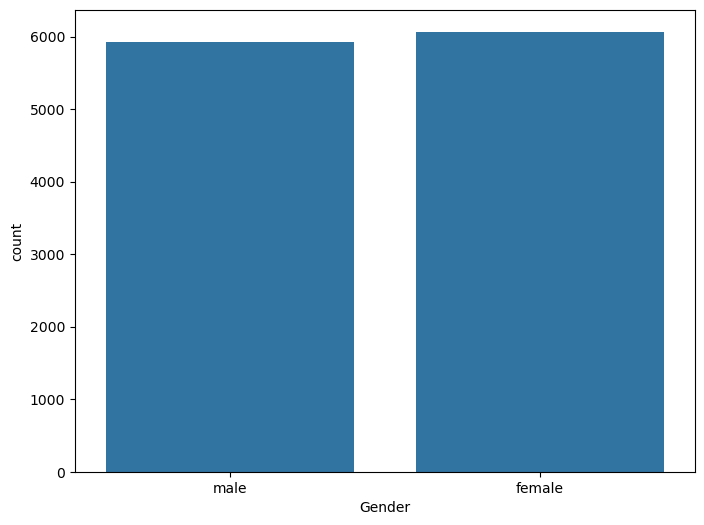

In [75]:
plt.rcParams["figure.figsize"] = 8, 6
sns.countplot(data= exercise_train_data, x= "Gender")

* As we can see, number of females are slightly higher than man but this distinction is not significant. We can say, there is no significant difference between the number of males and females in the sample.

In this section lets compare the exercise duration between males & females.

In [76]:
fig = px.box(exercise_train_data, x ="Duration", y= "Gender")
fig.update_layout(
    width= 800,
    height= 500,
)
fig.show()

* AS we can observe the median, IQR & etc, for both groups are overly identical. We provied this fact in the previous section. 

In [77]:
fig = px.box(exercise_train_data,  x= "Gender", y="Heart_Rate")
fig.update_layout(
    width= 800,
    height= 500,
)
fig.show()

* As we can see, again the ovwrall heart rate of both male & famale are similar. In addition to this , we have an outliears for the male.

In this section our purpose is combine the Weight column & the Heigth column values to perform a simple BMI calculation to classify individual of this datset into different groups according to their BMI value.

* The BMI(Body Mass Index) formula:
BMI = weight / height^2

* According to this page we will classify instance according to below table:

| Category | From | To |
| --- | --- | --- |
| Very severely underweight | 0 | 15 |
| Severely underweight | 15 | 16 |
| Underweight | 16 | 18.5 |
| Normal weight | 18.5 | 25 |
| Overweight | 25 | 30 |
| Obese Class I | 30 | 35 |
| Obese Class II | 35 | 40 |
| Obese Class III | 40 | 50 |

* We will classify examples according to above category :

In [78]:
for data in [exercise_train_data, exercise_test_data]:
    data["BMI"] = data["Weight"] / ((data["Height"] / 100 )** 2)
    data["BMI"] = round(data["BMI"], 2)

In [79]:
bmi_category = ["Very severely underweight", "Severely underweight", "Underweight", "Normal", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]
exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"], bins = [0, 15, 16, 18.5, 25, 30, 35, 40, 50], right=False, labels=bmi_category)
exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") 
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle_Aged,22.99,Normal


Now lets see the Categorized_BMI distribution in this dataset.

In [80]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI", "Count"]
ds

,Categorized_BMI,Count
0,Normal,7819
1,Overweight,4181


* As we can see, many parts of this dataset consists of Normal individuals. The second & last group is Overweight group. Other groups are not in the dataset wfich is normal. Because Obese & Underweight persons do not tend to do exercise .
* So let plot the boxplot of the first two categories. 

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

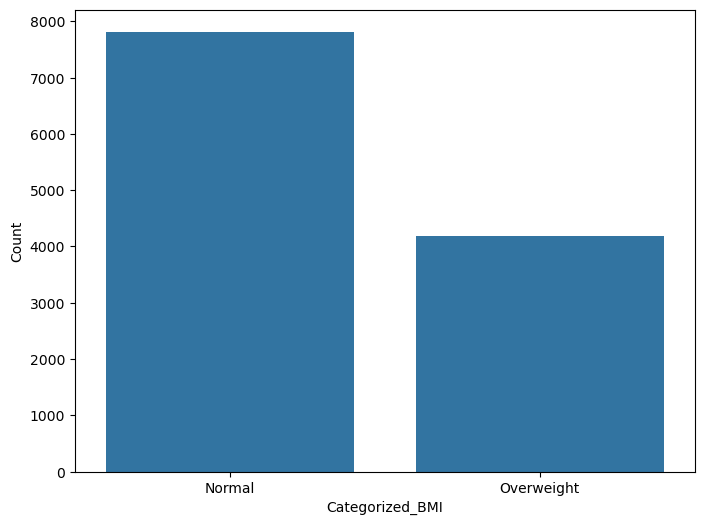

In [81]:
ds = ds[(ds["Categorized_BMI"]== "Normal") | (ds["Categorized_BMI"] == "Overweight")] 
plt.rcParams["figure.figsize"] = 8, 6
sns.barplot(data = ds, x = "Categorized_BMI", y = "Count")

* As we can see, many parts of this dataset consists of Normal individuals. The second & last group is Overweight group. Other groups are not in the dataset which is normal. Because Obese & Underweight person do not tend to do exercise.

Let get into details & see how many of each group are male & how many of them are female.

First of all lets prepare the dataset that shows the distribution of Categorized_BMI for each gender.

In [82]:
ds = exercise_train_data[["Gender", "Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender", "Categorized_BMI"])
ds.columns = ["Gender", "Categorized_BMI", "count"]
ds

,Gender,Categorized_BMI,count
0,female,Normal,5572
3,female,Overweight,496
2,male,Normal,2247
1,male,Overweight,3685


<Axes: xlabel='Categorized_BMI', ylabel='count'>

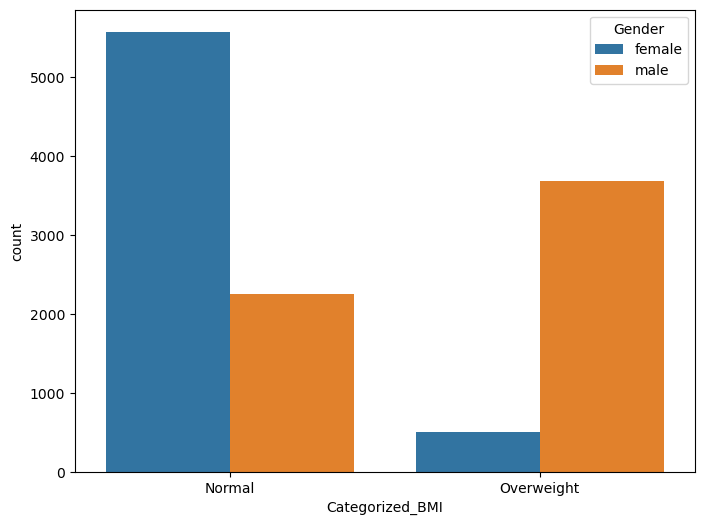

In [83]:
plt.rcParams["figure.figsize"] = 8, 6
sns.barplot(data = ds, x = "Categorized_BMI", y = "count", hue="Gender")

* An interesting thing that this graph shows is the weight distribution between each gender. The number of males who are overweight is way more than the number of females that have similar situation. & the number of that are in their ideal weight is really large in compare of other categories. In general, women have a better situation than men.

Now lets plot the Categirized_BMI distribution for each group ages.

In [84]:
ds = exercise_train_data[["age_groups", "Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups", "Categorized_BMI"])
ds.columns = ["age_groups", "Categorized_BMI", "count"]
ds

,age_groups,Categorized_BMI,count
0,Young,Normal,4369
2,Young,Overweight,1660
1,Middle_Aged,Normal,2197
3,Middle_Aged,Overweight,1338
4,Old,Normal,1253
5,Old,Overweight,1183


<Axes: xlabel='Categorized_BMI', ylabel='count'>

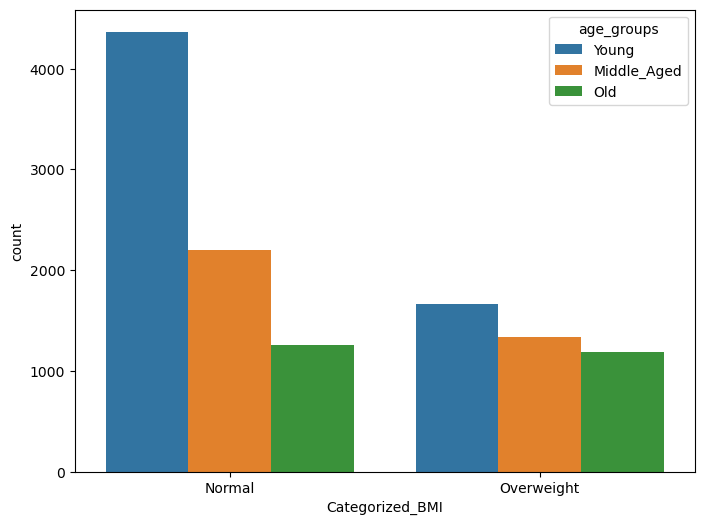

In [85]:
plt.rcParams["figure.figsize"] = 8, 6
sns.barplot(data = ds, x = "Categorized_BMI", y = "count", hue="age_groups")

* AS we can see the Categorized_BMI is identically distribution between age groups .
* An interesting thing is , about 50% of old individuals have Normal weight & another 50% have Overweight/Obese .

In [86]:
fig = px.scatter(exercise_train_data, x = "Duration", y = "Body_Temp", size="Calories")
fig.update_layout( width = 700, height = 500)
fig.show()

# [Person] Corelation

In this we are going to analyze the correlation between each two features. The correlation helps us to see, how much this two feature relationship is strong . If the ralationship of this extremely strong we will face collinearity problem in our model. This means that not only this two feature will not help us to build a better model but also they couse some problems for our model. One way is to remove one of these features.


In [87]:
plt.rcParams["figure.figsize"]= 8 , 6
corr = exercise_train_data.corr()
sns.heatmap(corr, annot= True, square= True, linewidths= .5, vmin = 0, vmax=1, cmap='Blues'  )

ValueError: could not convert string to float: 'male'

In [ ]:
from app import X_test, X_train, y_train 


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_predication =  linreg.predict(X_test)

* This heatmap shows the correlation of both features in each cell. As we can see, many faetures have high correlation with another feature. One thing that has to be mentioned is that we have to drop useless features as many as possible . Because when we have many features the dimension of features space will be very large & when our model runs on this features it will be very slow. Because of that we have to drop some features.
* If two or more features have a high correlation with each other , we have to save on of them & drop the rest , In this way, we can improve model's efficiency.
* According to the heatmap, weight & height have a high correlation but we combined them & put them into the BMI column . So we can drop weight & height column & save BMI.

Before we feed our data to the model we have to first convert categories column into numerical column.

In [ ]:
exercise_train_data= exercise_train_data[["Gender", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]
exercise_test_data = exercise_test_data[["Gender", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first= True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first= True)

* So now let's seperate X & Y for training set & test set.

In [ ]:
X_train = exercise_train_data.drop("Calories", axis=1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories", axis=1)
y_test = exercise_test_data["Calories"]

# Learning Curve

Learing curve is a plot of the model's performance on the training set & validation set as a function of the training set size . One of the concepts that we get is the appropriate number of example in training set size. If we take a look at the plot down below we will see that both training set size & validation set reached a plateau at a certain training set size . It means that, with only 800 training set size we will get similar results with our model in compare to 1000, 2500 or 5000 training set size. In other word increasing the training set size more than 800 will not improve the model's performance significantly,

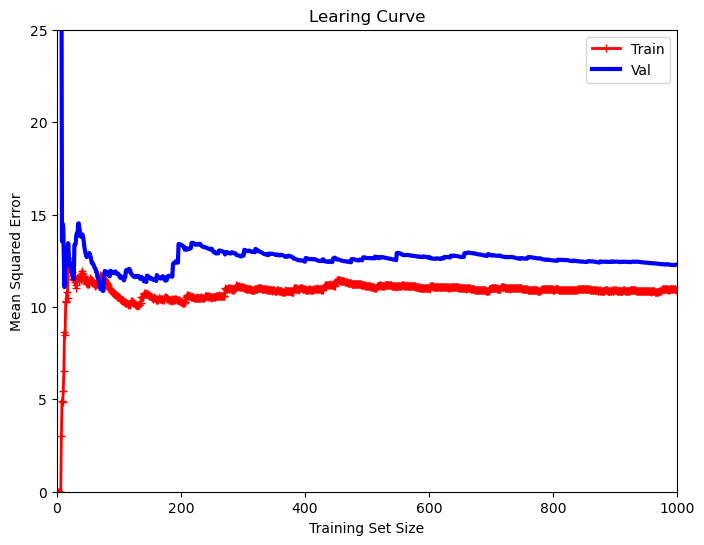

In [90]:
train_errors, val_errors = [], []
def plot_learning_curve(model):
    for m in range(1, 1000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test[:m], y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "Val")
    plt.title("Learing Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.xlim([0, 1000])
    plt.ylim([0, 25])
    plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)    

* As we can see , both curves plateaued at 800 in training set size axis. So it means if we increase the training set size more than 800 example, model's performance will not be improved significantly. SO we can reduce the training set size up to 800 example without decreasing the model's performance.
* Another reason that the training set & validation set could not reach a lower MSE with more example is that the dataset do not have enough informative features that our learing algorithm can leverage to build more performance model.

Building Regression Model

In [91]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_predication =  linreg.predict(X_test)

# Regression Evalution Metrics

Comparing metrics:

* MAE is the easiest to understand , because it's the average error.
* MSE is more popular than MAE because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE  is even more popular than MSE because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [92]:
print("Linear Regression Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, linreg_predication), 2))
print("Linear Regression Mean Squared Error: ", round(metrics.mean_squared_error(y_test, linreg_predication), 2))
print("Linear Regression Root Mean Squared Error: ", round(np.sqrt(metrics.mean_squared_error(y_test, linreg_predication)),2))

Linear Regression Mean Absolute Error:  8.52
Linear Regression Mean Squared Error:  140.08
Linear Regression Root Mean Squared Error:  11.84


* So we have just implemented a simple Linear Regration to predict the calories burned with various parameters. Our RMSE for linear Rigression is about 12
which is acceptable. As just I said it is a simple model. We can reduce this errors with just replacing simple model with more complex model.
* In the next section I will be using the RandomForestRegressor algorithm which uses begging method.

# RandomForestRegressor Algorithm
* In this section I will be using the GridSearchCV on of the cross-validation methods that we use for selecting hyperparameters.
* In this section, I will be using 3 hyperparameters for RandomForestRegressor algorithm which are n_estimators, max_features & max_depth. This will run on 5 splits & the split with highest accuracy will be selected.

NOTE : Sometimes running GridSearching is very time consuming in terms of computational complexity. So i have already run the GridSearchCV & put the best parameters into RandomForestRegressor directly & then run the model. So I commented out GridSearchCV & all of its dependencies.

In [93]:
# forest_reg = RandomForestRegressor()
#param_grid = {'n_estimators' : [10, 100, 1000],
#               'max_features' : [2, 2, 3],
#               'max_depth' : [2,4,6]}

#grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = -1, verbose = 3)
#grid_search.fit(X_train, y_train)

In [94]:
# grid_search.best_params_

In [95]:
# grid_search.best_estimator_

In [96]:
random_reg = RandomForestRegressor(n_estimators= 1000, max_features= 3, max_depth= 6)
random_reg.fit(X_train, y_train)
random_reg_prediction = random_reg.predict(X_test)

* As you can see , we get a slightly better result with RandomForestRegressor algorithm.

In [97]:
print("Linear Regression Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, random_reg_prediction), 2))
print("Linear Regression Mean Squared Error: ", round(metrics.mean_squared_error(y_test, random_reg_prediction), 2))
print("Linear Regression Root Mean Squared Error: ", round(np.sqrt(metrics.mean_squared_error(y_test, random_reg_prediction)),2))

Linear Regression Mean Absolute Error:  5.31
Linear Regression Mean Squared Error:  68.58
Linear Regression Root Mean Squared Error:  8.28


* As we can see the RMSE for ReandomForestRegressor is lower than Linear Regression's RMSE. It means that we can make better prediction with ReandomForestRegressor.

& now let's make a prediction to test model's performance . 1st we selected an example randomly & passed some numbers to the model & compared  the results.  

In [98]:
exercise_train_data.iloc[32]


Gender               male
Age                    23
Height              187.0
Weight               87.0
Duration             27.0
Heart_Rate          102.0
Body_Temp            40.3
Calories            140.0
age_groups          Young
BMI                 24.88
Categorized_BMI    Normal
Name: 5897, dtype: object

In [99]:
x_array = np.array([[24, 25, 28, 100, 40, 1]]).reshape(1,-1)
y_pred = random_reg.predict(x_array)
print("prediction :" , round(y_pred[0], 2))

prediction : 145.21


* As we can see this model did a good job & the predicted value is close to the real value in the dataset.